<a href="https://colab.research.google.com/github/EloizioHMD/Python_DS/blob/main/Regress%C3%A3o_Linear_(GoogleFlu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Regressão Linear - Google Flu
![](https://www.virology.ws/wp-content/uploads/2010/05/googleflu.png)

Notebook por [Eloízio Dantas](https://www.linkedin.com/in/eloiziohmdantas/).
Atividade proposta pelo professor [Abner Rodrigues](https://www.linkedin.com/in/abner-rodrigues-9b511018/) na [AWARI](https://www.linkedin.com/school/awari/).

A epidemia de gripe é um grande problema de saúde pública que causa um grande número de hospitalizações e mortes. De acordo com o National Vital Statistics Reports, publicado em outubro de 2012, influenza é a oitava causa de mortes em 2011 nos Estados Unidos. Para o mundo todo, a cada ano, morrem de 250000 à 500000 pessoas por ano de influenza.

O Centro de Controle de Doenças (CDC) e o European Influenza Surveillance Scheme (EISS) detectam influenza através de dados clínicos, entretanto essas informações são publicadas com atraso de 1-2 semanas.

O Google Flu Trends é um projeto que foi criado para testar se é possível identificar a quantidade de casos de gripe baseado na quantidade de buscas sobre o assunto, já que esse dado pode ser recuperado imediatamente.

Nosso objetivo é estimar o número de doenças similares a influenza (influenza-like illness ILI) usando a informação das buscas do Google.

Uma das fontes de dados, o Google Search Queries - Google Trends fornece a contagem semanal de buscas dos usuários do google ao redor do mundo. Para cada local, a contagem é normalizada dividindo a contadem de cada busca na semana pelo número total de buscas. Dessa forma os valores estão entre 0 e 1.

O arquivo csv [FluTrain](https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv) agrega os dois dados de Janeiro de 2004 até Dezembro de 2011, com as colunas:

> "Week" - A faixa de datas a qual a observação foi feita, no formato ano/mes/dia.<p>
> "ILI" - A porcentagem de casos de ILI reportados na semana.<p>
> "Queries" - A fração das buscas de ILI naquela semana.

In [13]:
# Carregar bibliotecas para o exercício
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.tsa.api as smt

In [2]:
# Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv')
df.head(5)

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


Apesar de ser bem interpretativo, rápido de estimar e fácil de usar, a regressão linear assume vários requisitos que precisam ser avaliados. Caso algum desses pré-requisitos não sejam cumpridos, as consequências podem ser desde problema de interpretação dos coeficientes até na qualidade do ajuste.

Em resumo, são requisitos necessários:

1. Linearidade;
2. Média dos resíduos igual a zero;
3. Sem multicolinariedade (forte);
4. Homocedasticidade dos resíduos;
5. Resíduos não podem ser autocorrelacionados;
6. Resíduos e variáveis não correlacionados;
7. Normalidade dos resíduos.

### **Problema 1**

Assim, nesse contexto, verifique se ILI segue uma distribuição normal. Caso não seja normal, utilize alguma estratégia para transformação desses dados.

Text(0, 0.5, 'Queries')

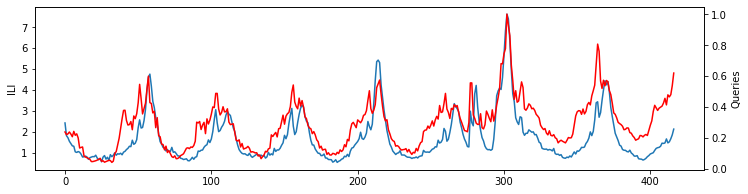

In [8]:
# Explorando os dados com DataViz
# Plot de dois eixo do ILI e Queries com Matplotlib
fig, ax1 = plt.subplots(figsize=(12,3))

ax2 = ax1.twinx()

ax1.plot( df['ILI'], label='ILI' )
ax1.set_ylabel('ILI')
ax2.plot( df['Queries'], color='r', label='Queries' )
ax2.set_ylabel('Queries')

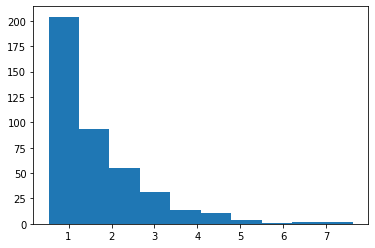

In [9]:
# Histogram do "ILI"
plt.hist(df['ILI']);

Os dados não seguem um distribuição normal, assim vamos usar uma função dos Scipy a [transformação de box-cox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

O `boxcox` requer que os dados de entrada sejam positivos. Às vezes, uma transformação Box-Cox fornece um parâmetro de deslocamento para conseguir isso; `boxcox` não. Esse parâmetro de deslocamento é equivalente a adicionar uma constante positiva a x antes de chamar `boxcox`.

In [27]:
# Transformada de Box-Cox pelo Scipy
ili_transformed, l = stats.boxcox( df['ILI'])

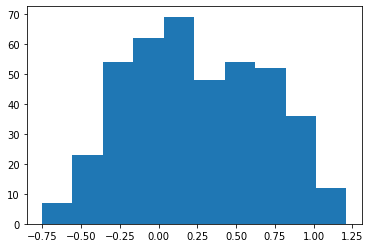

In [28]:
plt.hist(ili_transformed);

### **Problema 2**
Ajuste um modelo de regressão linear e calcule o  $R^2$.

In [29]:
x_train = sm.add_constant( df[['Queries']] ) # Criando o dataset das variáveis exógenas 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Regressão Linear pelo Statsmodels
model_flu = sm.OLS(ili_transformed, x_train)
results_flu =  model_flu.fit()
results_flu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     909.1
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.32e-106
Time:                        19:11:45   Log-Likelihood:                -1.9648
No. Observations:                 417   AIC:                             7.930
Df Residuals:                     415   BIC:                             16.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4052      0.025    -16.379      0.000      -0.454      -0.357
Queries        2.2845      0.076     30.151      0.000       2.136       2.433
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.788
Skew:                           0.018   Prob(JB):                        0.675
Kurtosis:                       2.790   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Problema 3**

O arquivo [FluTest.csv](https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv) contem os dados de 2012, utilize esses dados para teste. Calcule as métricas de erro para esse dataset e faça a análise residual.


In [31]:
df_test = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv')
df_test.head()

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625
1,2012-01-08 - 2012-01-14,1.543401,0.499336
2,2012-01-15 - 2012-01-21,1.647615,0.500664
3,2012-01-22 - 2012-01-28,1.684297,0.479416
4,2012-01-29 - 2012-02-04,1.863542,0.471448


In [32]:
x_test = df_test['Queries']
x_test = sm.add_constant( x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
y_pred = results_flu.predict( x_test )

Aqui nessa etapa um detalhe importante, anteriormente precisamos tranformar os dados com o Box-Cox e será necessário repetir essa etapa. Porém, ao fazer isso anteriormente armazenamos um valor λ (`l`), vamos usar esse valor para aplicar no dado de texte.

In [37]:
ili_test = stats.boxcox( df_test['ILI'], l )

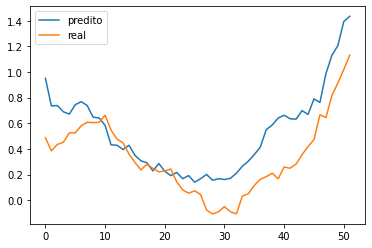

In [38]:
plt.plot( y_pred, label='predito' )
plt.plot( ili_test, label = 'real')
plt.legend()

Os dados ficaram bem parecidos. Como será que ficou a correlação?

In [39]:
result_df = pd.DataFrame( {'real':ili_test, 'predito':y_pred} )
result_df.head(5)

,real,predito
0,0.487100,0.950897
1,0.385130,0.735495
2,0.435404,0.738528
3,0.451935,0.689987
4,0.525283,0.671784


In [40]:
result_df.corr()

,real,predito
real,1.00000,0.88302
predito,0.88302,1.00000


Correlação de `0.88302` entre o real e o predito.

### Problema 4

Crie uma nova variável usando a coluna ILI com lag de 2. Utilize essa variável, além das buscas do google como entrada. Treine o modelo de regressão, refaça análise residual e verifique quais variáveis foram significativas. Compare as métricas de erro do dataset de teste desse modelo com o modelo anterior.

Os dados foram coletados com uma frequência semanal, usar aplicar um lag 2 nos dados significa que estamos espaçando a informação em duas semanas.

In [42]:
df['ili_lag'] = df['ILI'].shift(2)
df.head()

,Week,ILI,Queries,ili_lag
0,2004-01-04 - 2004-01-10,2.418331,0.237716,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2.418331
3,2004-01-25 - 2004-01-31,1.542495,0.237716,1.809056
4,2004-02-01 - 2004-02-07,1.437868,0.224436,1.712024


In [44]:
df = df.dropna() # Removendo linhas de valores faltantes

In [45]:
ili_transformed, l = stats.boxcox( df['ILI'] )

In [46]:
x_train = df[['Queries', 'ili_lag']]
x_train = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
model_flu2 = sm.OLS( ili_transformed, x_train)
model_results2 = model_flu2.fit()
model_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     790.8
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          8.86e-142
Time:                        19:33:39   Log-Likelihood:                 85.322
No. Observations:                 415   AIC:                            -164.6
Df Residuals:                     412   BIC:                            -152.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4480      0.020    -22.073      0.000      -0.488      -0.408
Queries        1.4044      0.087     16.146      0.000       1.233       1.575
ili_lag        0.1738      0.012     14.275      0.000       0.150       0.198
==============================================================================
Omnibus:                       59.446   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.299
Skew:                          -0.736   Prob(JB):                     5.65e-31
Kurtosis:                       5.427   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
df_test = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv')
df_test['ili_lag'] = df_test['ILI'].shift(2)

x_test = df_test[['Queries', 'ili_lag' ] ]
x_test = sm.add_constant( x_test )

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
y_pred2 = model_results2.predict(x_test)

In [51]:
ili_test_transformed = stats.boxcox( df_test['ILI'], l)

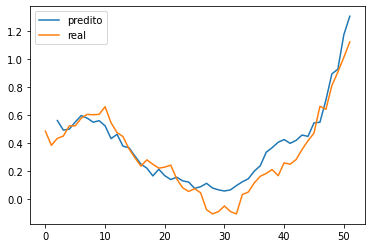

In [52]:
plt.plot( y_pred2, label='predito' )
plt.plot( ili_test_transformed, label = 'real')
plt.legend()

Com o lag de 2 semana o dado tentende a melhorar a previsibilidade, com um erro menor em razão da autocorrelação dos dados. Assim, seria possível construir um modelo de previsibilidade baseado em consultas no google e que poderia antecipar em duas semana um evento como uma gripe.

Vejamos como a autocorrelação se comporta ao longo de mais semanas.

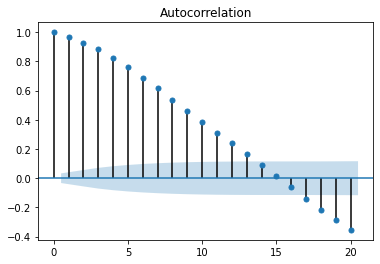

In [53]:
acf = smt.graphics.plot_acf( ili_transformed, lags=20, alpha=0.5 )
acf.show()

Esse gráfico é interessante, pois revela algo que é de conhecimeno popular. As temporadas de gripo tende ocorre no período mais frio (inverno), onde as pessoas tendem a aglomerá em espaços confinados e menos arejados.

A autocorrelação entre os dados se mantém positiva por 15 semanas o que é coorente com o período de um estação do ano.